In [378]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [384]:
df = pd.read_csv('../dataset/house-prices-advanced-regression-techniques/train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [385]:
X, y = np.array(df['YearBuilt']), np.array(df['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1022,) (438,)
(1022,) (438,)


[0.60633038 0.27465059]
[0.21087111 0.01520896]


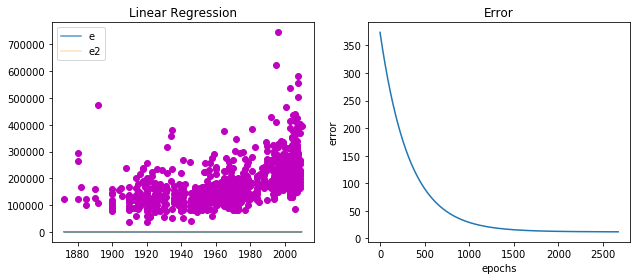

In [442]:
def normalize(X, y):
    X[:, 1] = (X[:, 1] - np.min(X[:, 1])) / (np.max(X[:, 1]) - np.min(X[:, 1]))
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    return X, y

def denormalize(X, y, theta):
    a, b, c, d = np.min(y), np.max(y) - np.min(y), np.min(X[:, 1]), np.max(X[:, 1]) - np.min(X[:, 1])
    theta_hat = np.array([b * theta[0] / d, b*theta[1] + a - c*b*theta[0]/d])
    return theta_hat

def linear_regression_mult_gd(X, y, epoch=5000, lr=.001):
    """Multivariate Linear Regression with Gradient Descent : Multidimensional."""
    total_expected_error = 0
    # Initialize the weights with random values
    W = np.random.uniform(size=X.shape[1])
    # We are just copying to presentation
    W_org = W.copy()
    errorlist = []
    epoch_steps = 0
    X, y = normalize(X, y)
    # Run for the epochs
    for k in range(epoch):
        # prediction
        Yh = X.dot(W)
        # calculate the error
        error = (Yh - y)
        # sum all the errors used in early stop and for presentation
        total_error = np.sum(error**2)
        # calculate the gradient
        gradient = X.T.dot(error) / X.shape[0]
        # adjust the weights using the learning rate and the gradient
        W += -lr * gradient
        # In case we need to stop iterating because the error is too low
        if np.abs(total_expected_error-total_error) < .0005:
            return W_org, W, total_error, errorlist, epoch_steps
        total_expected_error = total_error
        # Support vars
        errorlist.append(total_error)
        epoch_steps += 1
    return W_org, W, total_error, errorlist, epoch_steps

A = np.c_[np.ones(len(X_train)), X_train]
W_org, W, error, errorlist, epoch_steps = linear_regression_mult_gd(A, y_train)
print(W_org)
print(W)
#W = denormalize(A, y, W)
#print(W)
e = W[0] + (X_train * W[1])
e2 = W_org[0] + (X_train * W_org[1])

plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.title('Linear Regression')
plt.plot(X_train, y_train, 'mo')
plt.plot(X_train, e, alpha=.75, label='e')
plt.plot(X_train, e2, alpha=.25, label='e2')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Error')
plt.xlabel("epochs")
plt.ylabel("error")
plt.plot(range(epoch_steps), errorlist)
plt.tight_layout()
plt.show()

[1292.93219946    0.        ] -2367050.346883682


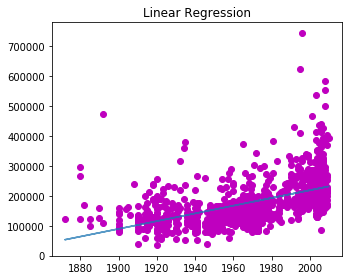

In [387]:
A = np.vstack([X_train, np.ones(len(X_train))]).T
reg = LinearRegression().fit(A, y_train)
print(reg.coef_, reg.intercept_)
e_sk_value = (reg.coef_ * A) + reg.intercept_

plt.figure(figsize=(5, 4))
plt.title('Linear Regression')
plt.plot(X_train, y_train, 'mo')
plt.plot(X_train, e_sk_value[:, 0], alpha=.75)
plt.tight_layout()
plt.show()